#### Import torch

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, models, transforms

#### Create a torch.nn module for CNN network

In [23]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels = 3,
                             out_channels = 16,
                             kernel_size = 5,
                             stride = 1,
                             padding = 2)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size = 2)
        self.cnn3 = nn.Conv2d(in_channels = 16,
                             out_channels = 32,
                             kernel_size = 5,
                             stride = 1,
                             padding = 2)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size = 2)
        self.linear = nn.Linear(32*128*128, 32)
        self.linear2 = nn.Linear(32, 7)
    def forward(self, x):
        out = self.cnn1(x)
        out = self.relu1(out)
        out = self.maxpool1(out)
        out = self.cnn3(out)
        out = self.relu3(out)
        out = self.maxpool3(out)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        out = self.linear2(out)
        return out

#### transform our images and normalise it for better model training

In [24]:
data_transforms = transforms.Compose([
    transforms.Resize([512,512]),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])
data_dir = 'train'
image_datasets = datasets.ImageFolder(data_dir, transform = data_transforms)
train_loader = torch.utils.data.DataLoader(dataset = image_datasets,
                                          batch_size = 2,
                                          shuffle = True)
image_datasets.classes
labels_h = ('Circle', 'Rectangle', 'Triangle')
dataset_size = len(image_datasets)

#### Function to display image

In [25]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [26]:
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)
model = model.cuda()   #transfer model to GPU

In [27]:
num_epochs = 15
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.cuda())
        labels = Variable(labels.cuda())
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        iter += 1
        print('epoch : {}, iter : {}, loss : {}'.format(epoch,i,loss.data[0]))

C:\Users\nEW u\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]


epoch : 0, iter : 0, loss : 2.0768308639526367
epoch : 0, iter : 1, loss : 28.116153717041016
epoch : 0, iter : 2, loss : 2.3637895584106445
epoch : 0, iter : 3, loss : 0.6925492286682129
epoch : 0, iter : 4, loss : 2.7928709983825684
epoch : 0, iter : 5, loss : 1.2016507387161255
epoch : 0, iter : 6, loss : 1.3129397630691528
epoch : 0, iter : 7, loss : 4.946051597595215
epoch : 0, iter : 8, loss : 1.3630969524383545
epoch : 0, iter : 9, loss : 1.168401837348938
epoch : 0, iter : 10, loss : 1.0427167415618896
epoch : 0, iter : 11, loss : 2.4840903282165527
epoch : 0, iter : 12, loss : 0.7311149835586548
epoch : 0, iter : 13, loss : 1.0630781650543213
epoch : 0, iter : 14, loss : 1.1653752326965332
epoch : 0, iter : 15, loss : 3.0243709087371826
epoch : 0, iter : 16, loss : 1.9904048442840576
epoch : 0, iter : 17, loss : 0.41591203212738037
epoch : 0, iter : 18, loss : 0.8097269535064697
epoch : 0, iter : 19, loss : 1.682956576347351
epoch : 1, iter : 0, loss : 0.731425404548645
epoch 

epoch : 8, iter : 10, loss : 0.031519412994384766
epoch : 8, iter : 11, loss : 0.04977607727050781
epoch : 8, iter : 12, loss : 0.03568840026855469
epoch : 8, iter : 13, loss : 0.032263755798339844
epoch : 8, iter : 14, loss : 0.0010137557983398438
epoch : 8, iter : 15, loss : 0.051412105560302734
epoch : 8, iter : 16, loss : 0.026374340057373047
epoch : 8, iter : 17, loss : 0.04549121856689453
epoch : 8, iter : 18, loss : 0.019968509674072266
epoch : 8, iter : 19, loss : 0.012178421020507812
epoch : 9, iter : 0, loss : 0.022535085678100586
epoch : 9, iter : 1, loss : 0.011606216430664062
epoch : 9, iter : 2, loss : 0.002483367919921875
epoch : 9, iter : 3, loss : 0.026144742965698242
epoch : 9, iter : 4, loss : 0.06059598922729492
epoch : 9, iter : 5, loss : 0.04082131385803223
epoch : 9, iter : 6, loss : 0.025952577590942383
epoch : 9, iter : 7, loss : 0.01294565200805664
epoch : 9, iter : 8, loss : 0.02979278564453125
epoch : 9, iter : 9, loss : 0.014676332473754883
epoch : 9, iter 

#### Now to test our model with the test data

In [28]:
data_dir = 'test'
test_datasets = datasets.ImageFolder(data_dir, transform = data_transforms)
test_loader = torch.utils.data.DataLoader(dataset = test_datasets,
                                          batch_size = 1,
                                          shuffle = True)

In [29]:
model.eval()

CNNModel(
  (cnn1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu3): ReLU()
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear): Linear(in_features=524288, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=7, bias=True)
)

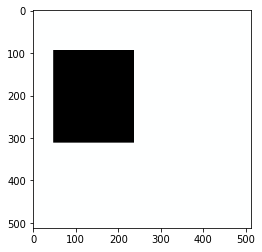

prediction -> Rectangle


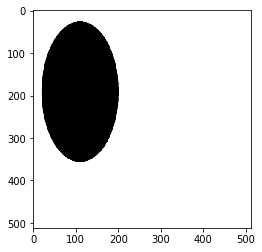

prediction -> Rectangle


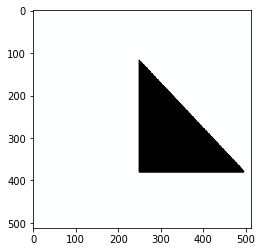

prediction -> Circle


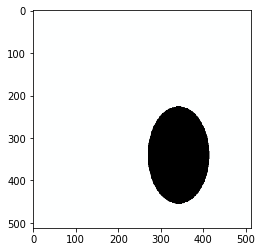

prediction -> Rectangle


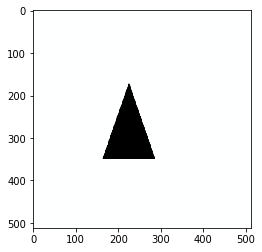

prediction -> Triangle


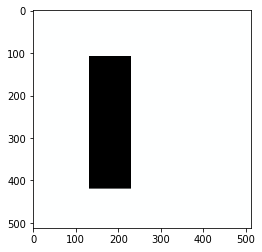

prediction -> Rectangle


In [30]:
for i, (images,labels) in enumerate(test_loader):
    imshow(torchvision.utils.make_grid(images))
    images=Variable(images.cuda())
    labels = Variable(labels.cuda())
    outputs = model(images)
    p,predicted = torch.max(outputs.data, 1)
    print('prediction -> {}'.format(labels_h[predicted[0]]))